In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, Tuple

import plot_settings
import plot_utils

from importlib import reload

In [60]:
results = pd.read_csv("../political_compass_results.csv")
results = results[results.prompt_name.isin(
    ["Green Party", "Labour Party", "National Party", "New Zealand First Party", "Opportunities Party"])]
results.head()

,Unnamed: 0,model,prompt_name,average_economic_score,average_social_score,forward_economic_score,forward_social_score,reverse_economic_score,reverse_social_score
7,7,gpt2,Green Party,-0.250,0.590,0.13,-2.77,-0.63,3.95
8,8,gpt2,Labour Party,0.505,0.230,0.63,-2.62,0.38,3.08
9,9,gpt2,National Party,-0.560,0.105,1.13,-3.38,-2.25,3.59
10,10,gpt2,New Zealand First Party,-0.255,0.285,-0.38,-3.28,-0.13,3.85
11,11,gpt2,Opportunities Party,0.440,0.360,-0.25,-2.97,1.13,3.69


In [61]:
gt_res = pd.read_csv("../political_compass_gold_standard_labels.csv")
gt_res = gt_res.rename(columns={"economic_score": "average_economic_score", "social_score": "average_social_score"})
gt_res.head()

,persona,average_economic_score,average_social_score
0,Hillary Clinton,7.5,5.0
1,Donald Trump,6.5,9.0
2,Gary Johnson,9.4,-1.5
3,Jill Stein,-2.4,-2.5
4,Green Party,-3.0,-2.9


In [62]:
result_rows = {
    m: [
        results[(results.model == m) & (results.prompt_name == party)] for party in ["Green Party", "Labour Party", "National Party", "New Zealand First Party", "Opportunities Party"]
    ] for m in plot_settings.MODELS if m != "gold_standard"
}
result_rows["gold_standard"] = [gt_res[gt_res.persona == cand] for cand in ["Green Party", "Labour Party", "National Party", "New Zealand First Party", "Opportunities Party"]]

// 0
o 1
- 2
x 3
* 4


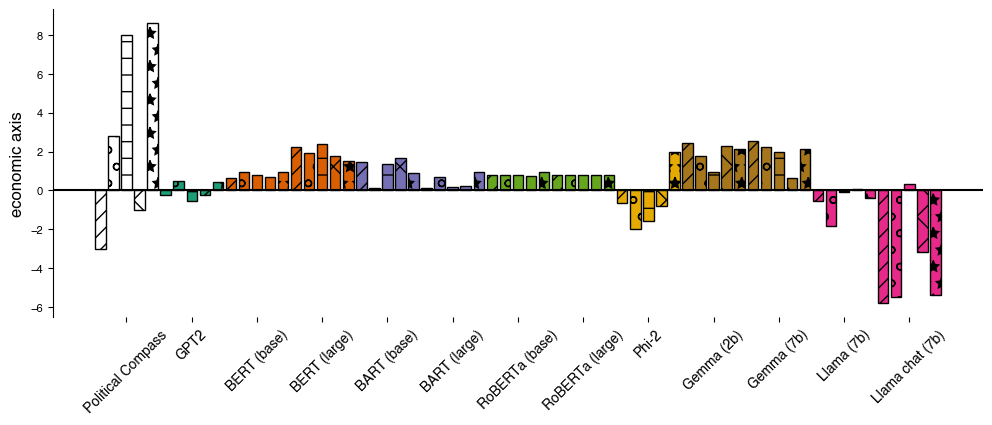

In [65]:
%matplotlib inline

# reload(plot_utils), reload(plot_settings)

ax = plot_utils.make_alternating_vertical_barplot(
    {m: [r.average_economic_score.iloc[0] for r in result_rows[m]] for m in result_rows},
    textures=["//", "o", "-", "x", "*"], metric="economic_score", double=True
)
plt.show()

// 0
o 1
- 2
x 3
* 4


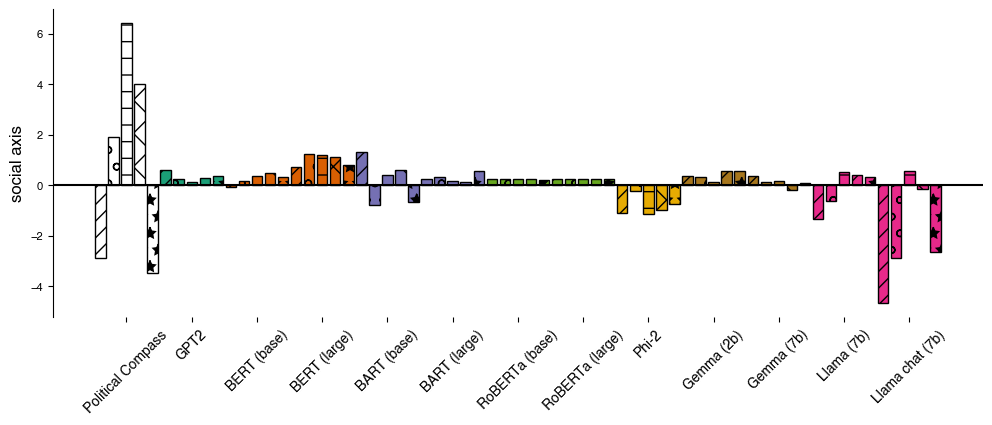

In [66]:
%matplotlib inline

# reload(plot_utils), reload(plot_settings)

ax = plot_utils.make_alternating_vertical_barplot(
    {m: [r.average_social_score.iloc[0] for r in result_rows[m]] for m in result_rows},
    textures=["//", "o", "-", "x", "*"], metric="social_score", double=True
)
plt.show()